In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

import repository

In [12]:
links = repository.get_all_links()
print(f"Number of links: {len(links)}")

Number of links: 39577


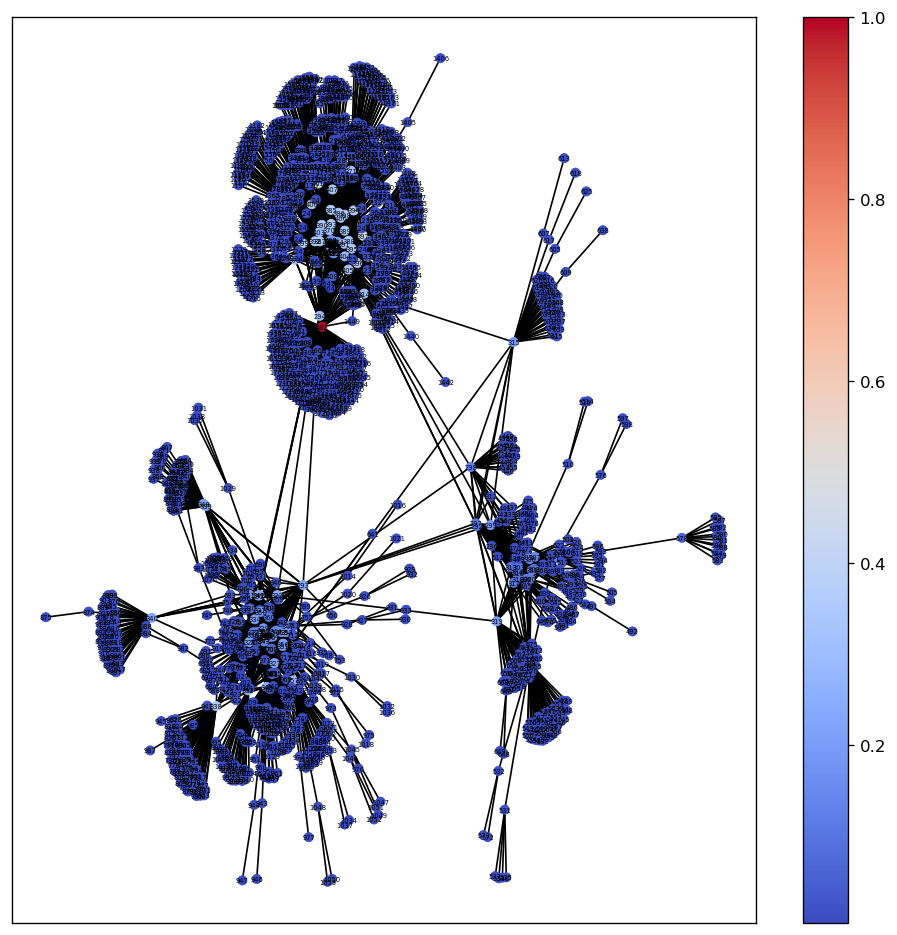

In [29]:
G = nx.Graph()

G.add_edges_from(links[:5000])

fig = plt.figure(facecolor="white", figsize=(10, 10), dpi=120)

# G = nx.karate_club_graph()

df = (pd.DataFrame(list(G.degree), columns=['node','degree']).set_index('node'))
df['color'] = df['degree'].transform(lambda c: c/c.max())

layout = nx.fruchterman_reingold_layout(G)
vmin = df['color'].min()
vmax = df['color'].max()
cmap = plt.cm.coolwarm

nx.draw_networkx(G, with_labels=True, node_color=df['color'], cmap=cmap, vmin=vmin, vmax=vmax, node_size=30, font_size=4, linewidths=0.5)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)